## Autoencoders - Exemplo Simples

In [ ]:
from tensorflow import keras
from keras import layers
from keras.utils import plot_model
from keras import regularizers

In [ ]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
  tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)



Vamos gerar alguns dados aleatórios em 3D usando a função `make_classification` do [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).

In [ ]:
from sklearn.datasets import make_blobs, make_classification
X,y = make_classification(n_samples=500, n_features=3, n_redundant=0,
                          random_state=10, class_sep=.5)

Em seguida, vamos verificar como os dados gerados se parecem:

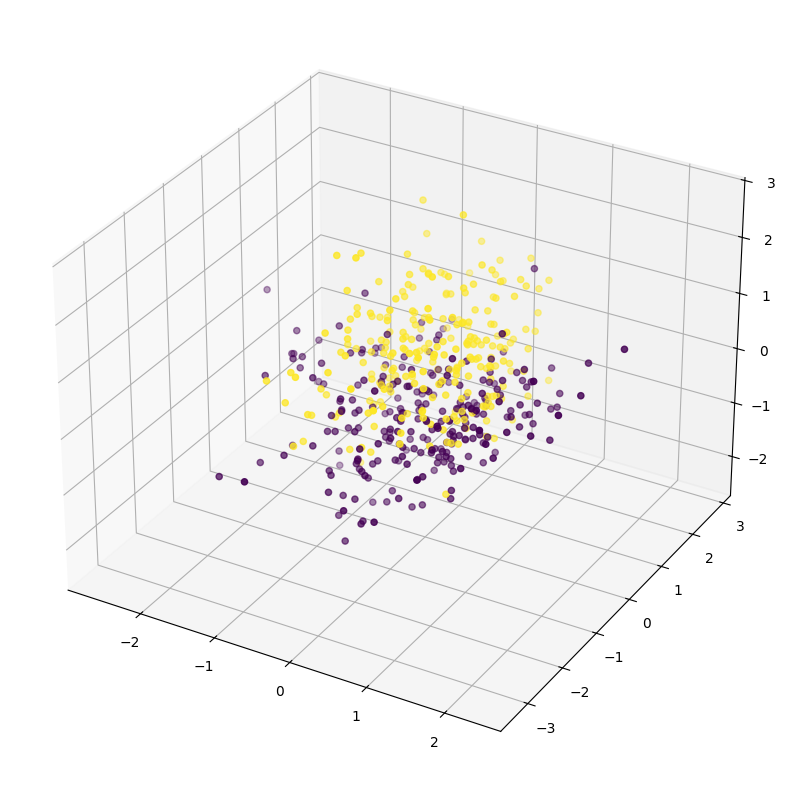

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

Agora vamos construir o autoencoder para os dados que acabamos de gerar.
Este autoencoder tem apenas uma camada oculta para o codificador e uma para o decodificador.

Nosso objetivo aqui é reduzir a dimensionalidade dos dados de $\mathcal{R}^3$ para $\mathcal{R}^2$.

In [ ]:
encoding_dim = 2

input_layer = keras.Input(shape=(3,))
encoded = layers.Dense(encoding_dim, activation="sigmoid")(input_layer)
decoded = layers.Dense(3, activation="sigmoid")(encoded)
autoencoder = keras.Model(input_layer, decoded)

Precisamos construir modelos separados para o codificador e o decodificador para avaliar a qualidade deles.

In [ ]:
encoder = keras.Model(input_layer, encoded)

encoded_input = keras.Input(shape=(encoding_dim,)) #the size of the encoder output

decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

Vamos treinar nosso modelo usando a função de perda MSE (erro quadrático médio) e o otimizador de descida de gradiente estocástica (SGD):

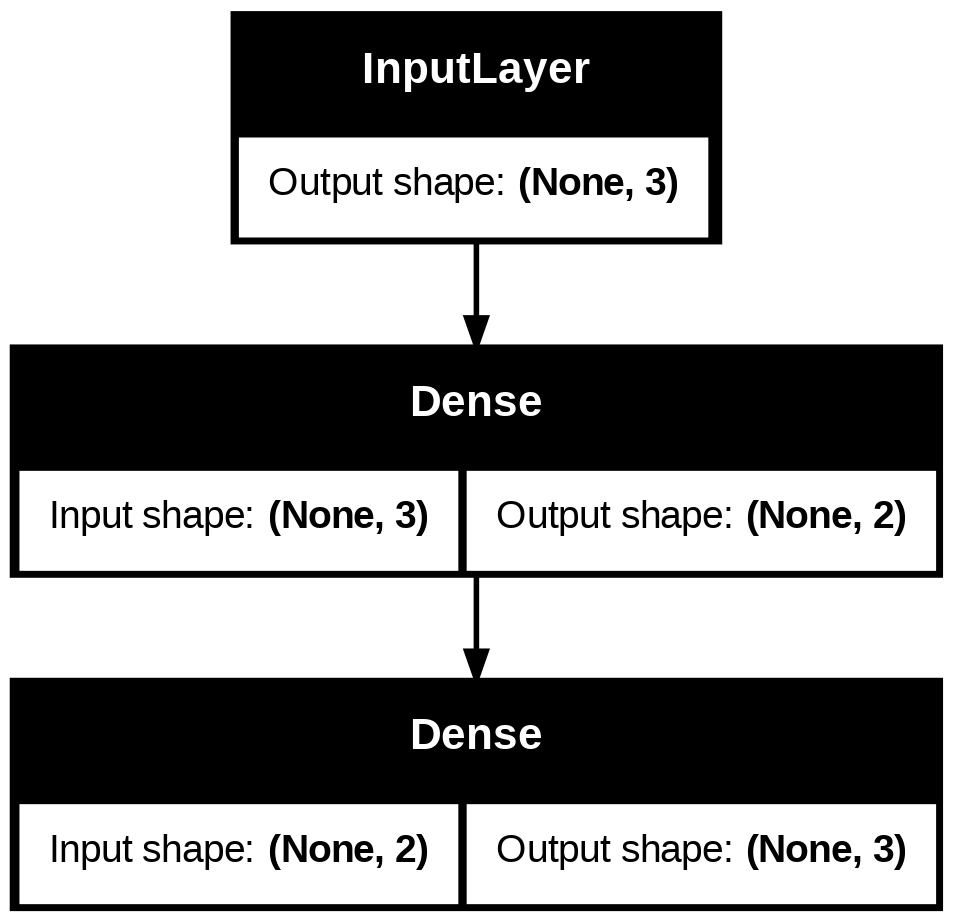

In [ ]:
autoencoder.compile(loss="mse", optimizer="SGD")
plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True)

Realizaremos o treinamento do nosso modelo por 100 épocas.

In [ ]:
history = autoencoder.fit(X, X, epochs=100, verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.0253
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0000
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0108 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9794 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9785 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9718 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9172 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9437 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9274 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0224 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9112
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9598 
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9542 
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9241 
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss:

Agora, vamos verificar como pode ser o espaço latente:

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


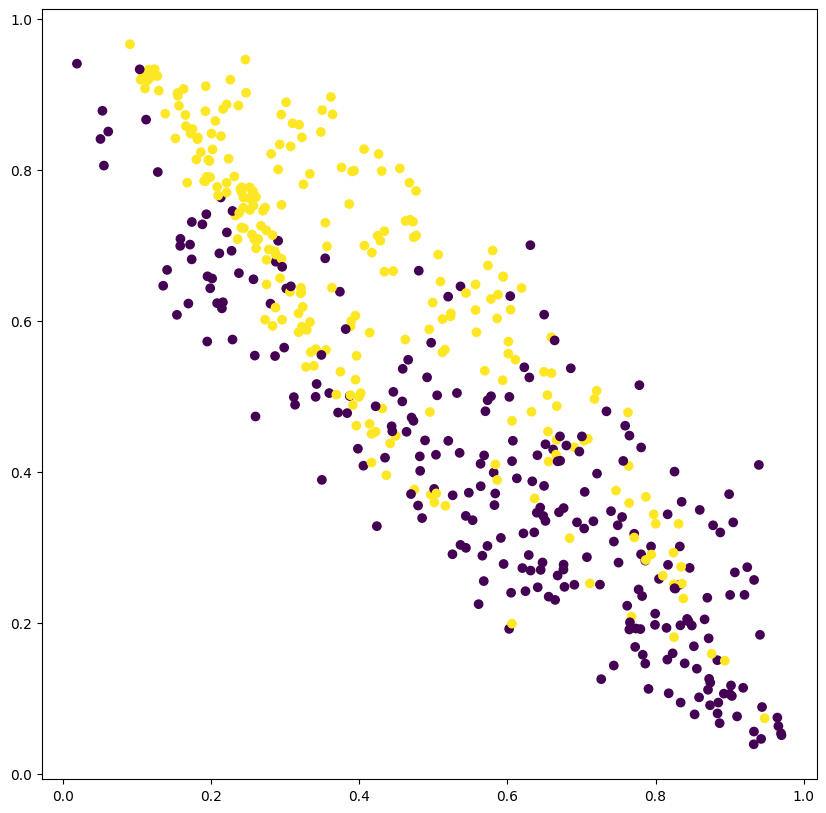

In [ ]:
codings = encoder.predict(X)
fig = plt.figure(figsize=(10,10))
plt.scatter(codings[:,0], codings[:, 1], c=y)
plt.show()

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
# Este é o tamanho das nossas representações codificadas
encoding_dim = 100

# Esta é a nossa imagem de entrada
input_img = keras.Input(shape=(784,))

# Adicionar uma camada Dense com um regularizador de atividade L1
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)

# "decoded" é a reconstrução com perda da entrada
decoded = layers.Dense(784, activation='relu')(encoded)

# Este modelo mapeia uma entrada para sua reconstrução
autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        79,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,684 (615.95 KB)

 Trainable params: 157,684 (615.95 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=2)

Epoch 1/100
235/235 - 3s - 14ms/step - loss: 0.1619 - val_loss: 0.1215
Epoch 2/100
235/235 - 1s - 3ms/step - loss: 0.1062 - val_loss: 0.0954
Epoch 3/100
235/235 - 2s - 6ms/step - loss: 0.0916 - val_loss: 0.0886
Epoch 4/100
235/235 - 1s - 5ms/step - loss: 0.0881 - val_loss: 0.0872
Epoch 5/100
235/235 - 1s - 4ms/step - loss: 0.0875 - val_loss: 0.0870
Epoch 6/100
235/235 - 1s - 5ms/step - loss: 0.0874 - val_loss: 0.0870
Epoch 7/100
235/235 - 1s - 3ms/step - loss: 0.0874 - val_loss: 0.0870
Epoch 8/100
235/235 - 1s - 3ms/step - loss: 0.0874 - val_loss: 0.0870
Epoch 9/100
235/235 - 1s - 5ms/step - loss: 0.0874 - val_loss: 0.0870
Epoch 10/100
235/235 - 1s - 5ms/step - loss: 0.0873 - val_loss: 0.0870
Epoch 11/100
235/235 - 1s - 6ms/step - loss: 0.0873 - val_loss: 0.0870
Epoch 12/100
235/235 - 1s - 5ms/step - loss: 0.0873 - val_loss: 0.0870
Epoch 13/100
235/235 - 1s - 6ms/step - loss: 0.0873 - val_loss: 0.0870
Epoch 14/100
235/235 - 1s - 5ms/step - loss: 0.0873 - val_loss: 0.0870
Epoch 15/100
2

In [ ]:
# Codificar e decodificar alguns dígitos
# Note que os pegamos do conjunto de *teste*
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


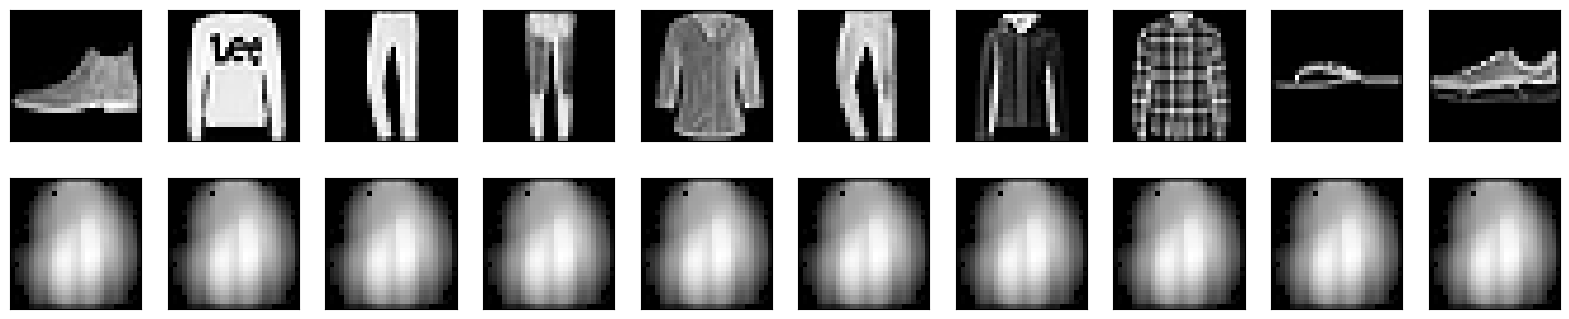

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Exercícios

Use o [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) para construir um autoencoder simples e realizar as seguintes tarefas:
1. Tente diferentes valores para o tamanho do espaço latente e relate a diferença na imagem reconstruída (você provavelmente precisará usar otimizadores/funções de perda melhores).
2. Utilize o [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) para visualizar dados de alta dimensão em um mapa bidimensional ou tridimensional. Tente visualizar como é o Espaço Latente usando a [implementação do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).
  1. Ao olhar para o t-SNE do Espaço Latente, você acha que os Autoencoders são uma boa ferramenta para gerar dados?